<a href="https://colab.research.google.com/github/hoangndst/ml-notebooks/blob/master/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Backpropagation
- Phương pháp phổ biến nhất để tối ưu MLP vẫn là Gradient Descent (GD). Để áp dụng GD, chúng ta cần tính được gradient của hàm mất mát theo từng ma trận trọng số $\mathbf{W}^{(l)}$ và và vector bias $\mathbf{b}^{(l)}$ 

\begin{eqnarray}
\mathbf{a}^{(0)} &=& \mathbf{x} \newline
z_{i}^{(l)} &=& \mathbf{w}_i^{(l)T}\mathbf{a}^{(l-1)} + b_i^{(l)} \newline
\mathbf{z}^{(l)}  &=& \mathbf{W}^{(l)T}\mathbf{a}^{(l-1)} + \mathbf{b}^{(l)},~~ l =  1, 2, \dots, L \newline
\mathbf{a}^{(l)} &=& f(\mathbf{z}^{(l)}), ~~ l =  1, 2, \dots, L \newline
\mathbf{\hat{y}} &=& \mathbf{a}^{(L)}
\end{eqnarray}

- Bước này được gói là feedforward vì cách tính toán được thực hiện từ đầu đến cuối của network. MLP cũng được gọi
- Giả sử $J(\mathbf{W, b, X, Y})$ là hàm mất mát.
    - Đạo hàm của hàm mất mát theo chỉ một thành phần của ma trận trọng số của lớp cuối cùng:
    \begin{eqnarray}
    \frac{\partial J}{\partial w_{ij}^{(L)}} &=& \frac{\partial J}{\partial z_j^{(L)}}. \frac{\partial z_j^{(L)}}{\partial w_{ij}^{(L)}} \newline
    &=& e_j^{(L)} a_i^{(L-1)}
    \end{eqnarray}
    - Trong đó $e_j^{(L)} = \frac{\partial J}{\partial z_j^{(L)}}$ là một đại lượng dễ tính. $\frac{\partial z_j^{(L)}}{\partial w_{ij}^{(L)}}  = a_i^{(L-1)}$ là vì $z_j^{(L)} = \mathbf{w}_j^{(L)T}\mathbf{a}^{(L-1)} + b_j^{(L)}$
    - Tương tự với đạo hàm mất mát theo bias của layer cuối cùng:
    \begin{eqnarray}
        \frac{\partial J}{\partial b_{j}^{(L)}} = \frac{\partial J}{\partial z_j^{(L)}}. \frac{\partial z_j^{(L)}}{\partial b_{j}^{(L)}} = e_j^{(L)}
    \end{eqnarray}

<img src='https://machinelearningcoban.com/assets/14_mlp/backpropagation.png' width='700px' />

- Dựa vào hính trên, ta có thể tính được:

    \begin{eqnarray}
\frac{\partial J}{\partial w_{ij}^{(l)}} &=& \frac{\partial J}{\partial z_j^{(l)}}. \frac{\partial z_j^{(l)}}{\partial w_{ij}^{(l)}} \newline
&=& e_j^{(l)} a_i^{(l-1)}
\end{eqnarray}

với:

\begin{eqnarray}
e_j^{(l)} &=& \frac{\partial J}{\partial z_j^{(l)}} = \frac{\partial J}{\partial a_j^{(l)}} . \frac{\partial a_j^{(l)}}{\partial z_j^{(l)}} \newline
&=& \left( \sum_{k = 1}^{d^{(l+1)}} \frac{\partial J}{\partial z_k^{(l+1)}} .\frac{\partial z_k^{(l+1)}}{\partial a_j^{(l)}} \right) f’(z_j^{(l)}) \newline
 &=&\left( \sum_{k = 1}^{d^{(l+1)}} e_k^{(l+1)} w_{jk}^{(l+1)} \right) f’(z_j^{(l)}) \newline
 &=&\left( \mathbf{w}_{j:}^{(l+1)} \mathbf{e}^{(l+1)} \right) f’(z_j^{(l)}) \newline
\end{eqnarray}


### Backpropagation cho Stochastic Gradient Descent
- Đạo hàm theo từng hệ số
    

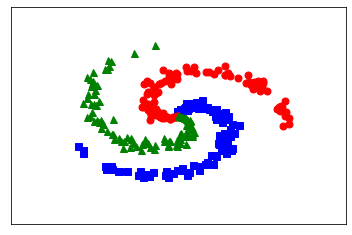

In [2]:
# source: https://machinelearningcoban.com/2017/02/24/mlp/#-gioi-thieu
from __future__ import division, print_function, unicode_literals
import math
import numpy as np
import matplotlib.pyplot as plt
N = 100 # number of points per class
d0 = 2 # dimensionality
C = 3 # number of classes
X = np.zeros((d0, N*C)) # data matrix (each row = single example)
y = np.zeros(N*C, dtype='uint8') # class labels

for j in range(C):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[:,ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
  y[ix] = j
# lets visualize the data:
# plt.scatter(X[:N, 0], X[:N, 1], c=y[:N], s=40, cmap=plt.cm.Spectral)

plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'ro', markersize = 7);
plt.plot(X[0, 2*N:], X[1, 2*N:], 'g^', markersize = 7);
# plt.axis('off')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

# plt.savefig('EX.png', bbox_inches='tight', dpi = 600)
plt.show()

### Mô hình trainning
<img src='https://machinelearningcoban.com/assets/14_mlp/ex_nn.png' witdh='700px' />

### Tính toán feedforward

\begin{eqnarray}
\mathbf{Z}^{(1)} &=& \mathbf{W}^{(1)T}\mathbf{X} \newline
\mathbf{A}^{(1)} &=& \max(\mathbf{Z}^{(1)}, \mathbf{0}) \newline
\mathbf{Z}^{(2)} &=& \mathbf{W}^{(2)T}\mathbf{A}^{(1)} \newline
\mathbf{\hat{Y}} = \mathbf{A}^{(2)} &=& \text{softmax}(\mathbf{Z}^{(2)})
\end{eqnarray}

- Hàm mất mát được tính như sau:

\begin{eqnarray}
J \triangleq J(\mathbf{W, b}; \mathbf{X, Y}) = -\frac{1}{N}\sum_{i = 1}^N \sum_{j = 1}^C y_{ji}\log(\hat{y}_{ji})
\end{eqnarray}

### Tính toán Backpropagation

\begin{eqnarray}
\mathbf{E}^{(2)} &=& \frac{\partial J}{\partial \mathbf{Z}^{(2)}} =\frac{1}{N}(\mathbf{\hat{Y}} - \mathbf{Y}) \newline
\frac{\partial J}{\partial \mathbf{W}^{(2)}} &=& \mathbf{A}^{(1)}  \mathbf{E}^{(2)T} \newline
\frac{\partial J}{\partial \mathbf{b}^{(2)}} &=& \sum_{n=1}^N\mathbf{e}_n^{(2)} \newline
\mathbf{E}^{(1)} &=& \left(\mathbf{W}^{(2)}\mathbf{E}^{(2)}\right) \odot f’(\mathbf{Z}^{(1)}) \newline
\frac{\partial J}{\partial \mathbf{W}^{(1)}} &=& \mathbf{A}^{(0)}  \mathbf{E}^{(1)T} = \mathbf{X}\mathbf{E}^{(1)T}\newline
\frac{\partial J}{\partial \mathbf{b}^{(1)}} &=& \sum_{n=1}^N\mathbf{e}_n^{(1)} \newline
\end{eqnarray}


In [7]:
def softmax(V):
    e_V = np.exp(V - np.max(V, axis = 0, keepdims = True))
    Z = e_V / e_V.sum(axis = 0)
    return Z

## One-hot coding
from scipy import sparse
def convert_labels(y, C = 3):
    Y = sparse.coo_matrix((np.ones_like(y),
        (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

# cost or loss function
def cost(Y, Yhat):
    return -np.sum(Y*np.log(Yhat))/Y.shape[1]

print('X: \n', X.shape)
print('y: \n', y.shape)

X: 
 (2, 300)
y: 
 (300,)


In [11]:
d0 = 2
d1 = h = 100 # size of hidden layer
d2 = C = 3
# initialize parameters randomly
W1 = 0.01*np.random.randn(d0, d1)
b1 = np.zeros((d1, 1))
W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))

Y = convert_labels(y, C)
N = X.shape[1]
eta = 1 # learning rate
print('W_1: \n', W1.shape)
print('W_2: \n', W2.shape)
print('X: \n', X.shape)
print('y: \n', Y)

W_1: 
 (2, 100)
W_2: 
 (100, 3)
X: 
 (2, 300)
y: 
 [[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [12]:
for i in range(1000000):
    # Feedforward
    Z1 = np.dot(W1.T, X) + b1
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    Y_hat = softmax(Z2)

    # print loss after each 1000 iterations
    if i %1000 == 0:
        # compute the loss: average cross-entropy loss
        loss = cost(Y, Y_hat)
        print("iter %d, loss: %f" %(i, loss))
    # backpropagation
    E2 = (Y_hat - Y) / N
    dW2 = np.dot(A1, E2.T)
    db2 = np.sum(E2, axis = 1, keepdims = True)
    E1 = np.dot(W2, E2)
    E1[Z1 <= 0] = 0 # gradient ReLU
    dW1 = np.dot(X, E1.T)
    db1 = np.sum(E1, axis = 1, keepdims = True)

    # Update GD
    W1 += -eta*dW1
    b1 += -eta*db1
    W2 += -eta*dW2
    b2 += -eta*db2


iter 0, loss: 1.098545
iter 1000, loss: 0.158888
iter 2000, loss: 0.051854
iter 3000, loss: 0.035895
iter 4000, loss: 0.029127
iter 5000, loss: 0.025598
iter 6000, loss: 0.023390
iter 7000, loss: 0.021846
iter 8000, loss: 0.020674
iter 9000, loss: 0.019747
iter 10000, loss: 0.018991
iter 11000, loss: 0.018375
iter 12000, loss: 0.017845
iter 13000, loss: 0.017371
iter 14000, loss: 0.016962
iter 15000, loss: 0.016585
iter 16000, loss: 0.016252
iter 17000, loss: 0.015965
iter 18000, loss: 0.015711
iter 19000, loss: 0.015483
iter 20000, loss: 0.015276
iter 21000, loss: 0.015084
iter 22000, loss: 0.014909
iter 23000, loss: 0.014748
iter 24000, loss: 0.014588
iter 25000, loss: 0.014440
iter 26000, loss: 0.014304
iter 27000, loss: 0.014178
iter 28000, loss: 0.014062
iter 29000, loss: 0.013955
iter 30000, loss: 0.013855
iter 31000, loss: 0.013762
iter 32000, loss: 0.013674
iter 33000, loss: 0.013591
iter 34000, loss: 0.013513
iter 35000, loss: 0.013438
iter 36000, loss: 0.013368
iter 37000, lo